<a href="https://colab.research.google.com/github/vishnudas-1212/easy-cnn/blob/main/CNN_cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
from keras.datasets import cifar100

In [63]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

In [64]:
x_train.shape

(50000, 32, 32, 3)

In [65]:
x_test.shape

(10000, 32, 32, 3)

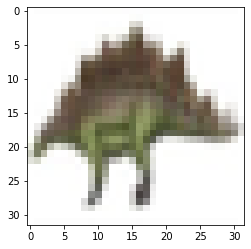

In [66]:
plt.imshow(x_train[1])

In [67]:
x_train=x_train/255

In [68]:
x_test=x_test/255

In [69]:
from keras.utils import  to_categorical

In [70]:
y_cat_train=to_categorical(y_train,100)

In [71]:
y_cat_test=to_categorical(y_test,100)

In [72]:
y_cat_train.shape

(50000, 100)

In [73]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten 

In [74]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=62,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(900,activation='relu'))
model.add((Dense(100,activation='softmax')))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 62)        17918     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 62)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2232)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 900)               2009700   
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

In [76]:
model.fit(x_train,y_cat_train,verbose=1,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 61ms/step - loss: 3.8317 - accuracy: 0.1279
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 2.6779 - accuracy: 0.3311
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 2.2255 - accuracy: 0.4247
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.8996 - accuracy: 0.5029
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6365 - accuracy: 0.5645


In [77]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 16ms/step - loss: 2.7211 - accuracy: 0.3787


[2.721088409423828, 0.37869998812675476]

In [78]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 16ms/step - loss: 2.7211 - accuracy: 0.3787


[2.721088409423828, 0.37869998812675476]

In [79]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       100
           1       0.39      0.62      0.48       100
           2       0.40      0.18      0.25       100
           3       0.21      0.27      0.23       100
           4       0.14      0.36      0.20       100
           5       0.28      0.34      0.31       100
           6       0.33      0.50      0.40       100
           7       0.48      0.39      0.43       100
           8       0.74      0.34      0.47       100
           9       0.57      0.49      0.53       100
          10       0.30      0.26      0.28       100
          11       0.19      0.41      0.26       100
          12       0.47      0.29      0.36       100
          13       0.33      0.35      0.34       100
          14       0.32      0.41      0.36       100
          15       0.30      0.26      0.28       100
          16       0.43      0.33      0.38       100
          17       0.53    

In [81]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)